# Exploración de archivos

In [1]:
import pandas as pd

In [2]:
folder = 'datos_EthicApp/2020.CD2201/'
ejemplo = '2020.CD2201.04.A2.csv'

df = pd.read_csv(folder + ejemplo, delimiter=';',index_col='id')
df = df.drop(columns=['name','rut'])
df.head()

,user_id,team_id,gender,df,title,opt_left,opt_right,max_num,sel,comment,phase,time
id,,,,,,,,,,,,
5055,1510,NaN,F,1,Es adecuado que Laura le dedique paulatinament...,Ajustar dedicación,Mantener dedicación,6,2,NaN,1,2020-09-26T21:20:21.703Z
5058,1462,NaN,F,1,Es adecuado que Laura le dedique paulatinament...,Ajustar dedicación,Mantener dedicación,6,4,NaN,1,2020-09-26T21:20:24.146Z
5059,1587,NaN,F,1,Es adecuado que Laura le dedique paulatinament...,Ajustar dedicación,Mantener dedicación,6,3,NaN,1,2020-09-26T21:20:25.389Z
5070,1517,NaN,F,1,Es adecuado que Laura le dedique paulatinament...,Ajustar dedicación,Mantener dedicación,6,3,NaN,1,2020-09-26T21:20:34.430Z
5074,1510,NaN,F,2,Respecto de los ingenieros que renuncian al pr...,Renunciar al proyecto,Quedarse en el proyecto,6,1,Ya que cada persona es libre de decidir si con...,1,2020-09-26T21:20:45.437Z


In [3]:
for title in df['title'].unique():
    print(title+'\n')

Es adecuado que Laura le dedique paulatinamente más tiempo al trabajo y su desarrollo profesional que a la familia y las otras dimensiones de su vida.

Respecto de los ingenieros que renuncian al proyecto debido al impacto generado, ¿qué decisión le parece más correcta?

Fue adecuado que Laura ante al error cometido en su anterior trabajo haya renunciado.



In [4]:
print("Cantidad de respuestas: {}".format(len(df)))

Cantidad de respuestas: 815


In [5]:
print('Cantidad de valores nulos por columna:')
display(df.isna().sum())
print('Cantidad de valores únicos por columna:')
display(df.nunique())

Cantidad de valores nulos por columna:


user_id        0
team_id      261
gender         0
df             0
title          0
opt_left       0
opt_right      0
max_num        0
sel            0
comment      225
phase          0
time           0
dtype: int64

Cantidad de valores únicos por columna:


user_id      102
team_id       68
gender         3
df             3
title          3
opt_left       3
opt_right      3
max_num        2
sel            7
comment      394
phase          3
time         815
dtype: int64

In [6]:
df = df[df['comment'].notna()]
print("Cantidad de respuestas con texto: {}".format(len(df)))

Cantidad de respuestas con texto: 590


## Exploración básica del texto

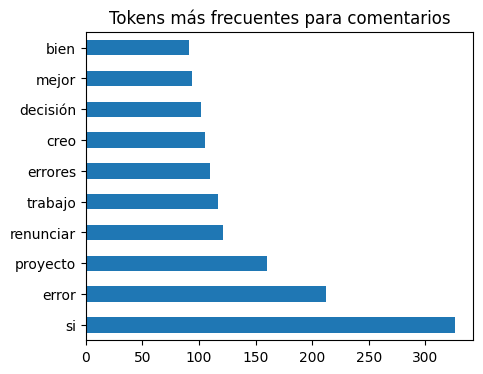

In [7]:
from exploration_utils import plot_token_frequency, most_common
from nltk.corpus import stopwords

serie_tokens = most_common(df,'comment',ignore=stopwords.words('spanish'))
plot_token_frequency(serie_tokens,'Tokens más frecuentes para comentarios')

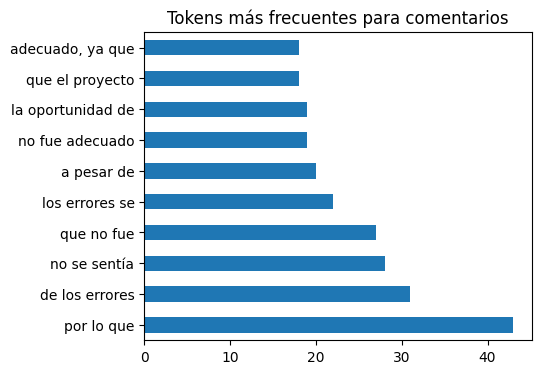

In [8]:
serie_tokens3 = most_common(df,'comment',ignore=stopwords.words('spanish'),n_grams=3)
plot_token_frequency(serie_tokens3,'Tokens más frecuentes para comentarios')

---

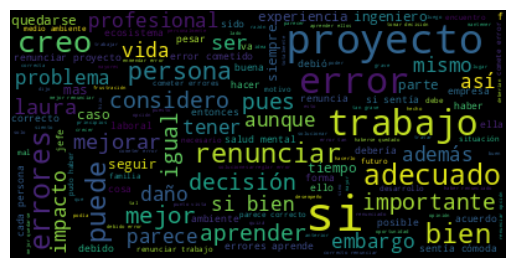

In [10]:
from exploration_utils import wordcloud_from_column

wordcloud_from_column(df,'comment',ignore=stopwords.words('spanish'))